In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#Loading the dataset
dfx = pd.read_csv('./Training Data/Diabetes_XTrain.csv')
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [3]:
dfy = pd.read_csv('./Training Data/Diabetes_YTrain.csv')
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [4]:
dfx1 = pd.read_csv('./Testing Data/Diabetes_XTest.csv')
dfx1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [7]:
# Convert the dataframe into numpy array
x = dfx.values
y = dfy.values
x1 = dfx1.values

#transposing the y matrix for calculation purpose
y=y.reshape(-1)

print(x.shape)
print(y.shape)

print(x)

(576, 8)
(576,)
[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]


# Diabetes Classification Algorithm

In [8]:
#calculates the distance between two points
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [13]:
#function that predicts the querypoint classification
def knn(x,y,queryPoint,k=25):#considering 25 points for demonstration
    vals = [] #vals list contains the distances from all the points to query point array(testing data points) and class to which it belongs respectively
    m = x.shape[0]#contains the number of points in the dataset
    for i in range(m):
        d = dist(queryPoint,x[i])#passing the query point array(testing data points) and all the points for distance calculation
        vals.append((d,y[i]))#Y[i] indicates the class in which the point belongs to
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]#As the list is sorted, the first k-points are closest to the query point
    vals = np.array(vals)#converting to numpy array for easy calculation
    #np.unique returns the number of different classes, in our case only 2 classes->class 0 and class 1 are available
    #return_counts=true parameter returns the count of the unique values in the list
    new_vals = np.unique(vals[:,1],return_counts=True)
    #new_vals[0] returns unique numbers list,new_vals[1] returns the count of unique number
    index = new_vals[1].argmax()#argmax returns the index of the class which has maximum unique count
    pred = new_vals[0][index]#returns the class of the querypoint
    return pred

In [14]:
#function to classify(predict) the diabates disease based on given data

def predict(x_tst,x,y):
    
    y_pred = []
    cnt=0
    for i in range(x_tst.shape[0]):
        p = knn(x,y,x_tst[i])        
        y_pred.append(p)
    y_pred = np.array(y_pred)
    
    return  y_pred

In [15]:
#passing the data to predict the required classification
res = predict(x1,x,y)
print(res)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]


# Plotting the Output

In [16]:
output = np.unique(res,return_counts=True)
print(output)
cnt_0 = output[1][0]
cnt_1 = output[1][1]
print(cnt_0,cnt_1)

(array([0., 1.]), array([136,  56], dtype=int64))
136 56


[0 1]


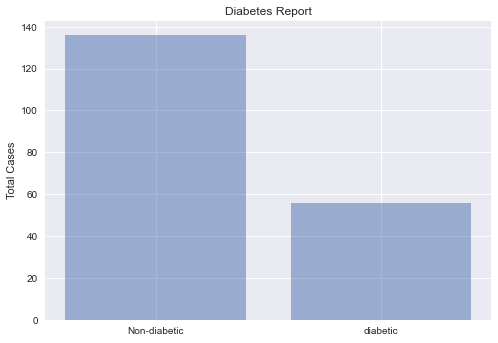

In [18]:
labels = ("Non-diabetic","diabetic")
rangex = np.arange(len(labels))#gives the length of classification(2->diabetic and non-diabetic)
performance = [cnt_0,cnt_1]
plt.bar(rangex, performance, align='center', alpha=0.5)#alpha is used to show the transparency
plt.xticks(rangex, labels)
plt.ylabel('Total Cases')
plt.title('Diabetes Report')

plt.show()